In [1]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
from sim.netrual import Component, NLT_reserve, NLT_components  # noqa
from sim.data import get_batch_price
import pandas as pd


## Prepare market Data

In [3]:
target = ['EOS', 'OMG', 'ELF', 'INS', 'MANA', 'IOST', 'ARK', 'ETH']
market_prices = get_batch_price(target)
m = market_prices
m.head()

,EOS,timestamp,OMG,ELF,INS,MANA,IOST,ARK,ETH
0,9.513628,1.517762e+09,12.220460,1.424711,2.778753,0.101204,0.041005,4.420315,872.89
1,9.571649,1.517762e+09,12.150611,1.428336,2.767728,0.100280,0.040984,4.418087,872.45
2,9.503056,1.517762e+09,12.242008,1.422520,2.715798,0.098882,0.040767,4.403600,872.00
3,9.447612,1.517763e+09,12.094019,1.414750,2.718675,0.099569,0.040694,4.351696,867.39
4,9.428780,1.517763e+09,12.042690,1.434984,2.747469,0.098874,0.041125,4.343819,865.82


## Define

### Price I:

\begin{gather*}
\frac{Highest(Price_{cmponents}) \times min_{bid}(Highest(Price_{cmponents}))}{1000}
\end{gather*}

### Price II:

\begin{gather*}
\frac{\sum{component_{reserve}}}{NLT_{total\ supply}}
\end{gather*}

### Auction:

\begin{gather*}
Auction(\frac{price_{NLT}}{price_{Component}}\times 1000) \iff Price_{NLT} > \frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

### Redeem:

\begin{gather*}
Redeem \iff Price_{NLT}<\frac{Price_{Token} \times NLT_{min bid}}{1000}
\end{gather*}

## Simulation

In [4]:
from sim.utils import redeem_strategy, auction_strategy
from sim.simulator import sim_loop
from sim.netrual import NLT_accounts
import random

# NLT_accounts['satoshi'] = 10000000000000

In [5]:
res = sim_loop(m)

True
True
True
True
True
True
True
True
EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1000}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2000}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 3000}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 4000}
MANA:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 5000}
IOST:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 6000}
ARK:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 7000}
ETH:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 8000}
PRICE OF NLT 15.000000000000002
plan to redeem {} for
Redeemed {}
PRICE OF NLT 15.091480620215247
plan to redeem {'ELF': 2000, 'IOST': 2000, 'ARK': 2000, 'ETH': 2000} for
Redeeming Current accounts 

PRICE OF NLT 19.767187372954407
plan to redeem {} for
Redeemed {}
PRICE OF NLT 19.85437016442464
plan to redeem {} for
Redeemed {}
EOS:: New cycle 32
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 35000.0}
OMG:: New cycle 32
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 36000.0}
ELF:: New cycle 32
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 37000.0}
INS:: New cycle 32
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 38000.0}
MANA:: New cycle 32
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 39000.0}
IOST:: New cycle 32
ARK:: New cycle 32
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 40000.0}
ETH:: New cycle 32
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 41000.0}
PRICE OF NLT 20.436756771728312
plan to redeem {'EOS': 59000, 'OMG': 72000, 'ELF': 67000, 'INS': 64000, 'MANA': 56000, 'ARK': 59000} for
Redeeming Current 

Redeemed {}
PRICE OF NLT 40.747013417031496
plan to redeem {} for
Redeemed {}
PRICE OF NLT 41.126281420139065
plan to redeem {} for
Redeemed {}
PRICE OF NLT 41.32353792361685
plan to redeem {} for
Redeemed {}
EOS:: New cycle 53
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 37000.0}
OMG:: New cycle 53
ELF:: New cycle 53
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 38000.0}
INS:: New cycle 53
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 39000.0}
MANA:: New cycle 53
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 40000.0}
IOST:: New cycle 53
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 41000.0}
ARK:: New cycle 53
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 42000.0}
ETH:: New cycle 53
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 43000.0}
PRICE OF NLT 42.059226917150916
plan to redeem {} for
Redeemed {}
plan to auc

plan to redeem {} for
Redeemed {}
PRICE OF NLT 85.45881498176682
plan to redeem {} for
Redeemed {}
PRICE OF NLT 84.97322622144726
plan to redeem {} for
Redeemed {}
PRICE OF NLT 85.0169015593622
plan to redeem {} for
Redeemed {}
EOS:: New cycle 78
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 19000.0}
OMG:: New cycle 78
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 20000.0}
ELF:: New cycle 78
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 21000.0}
INS:: New cycle 78
MANA:: New cycle 78
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 22000.0}
IOST:: New cycle 78
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 23000.0}
ARK:: New cycle 78
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 24000.0}
ETH:: New cycle 78
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 25000.0}
PRICE OF NLT 85.92904989098811
plan to redeem {} for
Redee

PRICE OF NLT 130.95132285043516
plan to redeem {} for
Redeemed {}
PRICE OF NLT 130.95132285043516
plan to redeem {} for
Redeemed {}
PRICE OF NLT 130.95132285043516
plan to redeem {} for
Redeemed {}
EOS:: New cycle 97
OMG:: New cycle 97
ELF:: New cycle 97
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 42000.0}
INS:: New cycle 97
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 43000.0}
MANA:: New cycle 97
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 44000.0}
IOST:: New cycle 97
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 45000.0}
ARK:: New cycle 97
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 46000.0}
ETH:: New cycle 97
PRICE OF NLT 136.50925535620152
plan to redeem {'EOS': 75000, 'OMG': 75000, 'ELF': 91000, 'MANA': 94000, 'IOST': 96000, 'ARK': 95000, 'ETH': 84000} for
Redeeming Current accounts {'satoshi': 46000.0}, redeem 75000.0 for satoshi
Failed on Burning
Re

PRICE OF NLT 151.90401158543213
plan to redeem {} for
Redeemed {}
PRICE OF NLT 152.56317993068274
plan to redeem {} for
Redeemed {}
EOS:: New cycle 105
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 43000.0}
OMG:: New cycle 105
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 44000.0}
ELF:: New cycle 105
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 45000.0}
INS:: New cycle 105
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 46000.0}
MANA:: New cycle 105
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 47000.0}
IOST:: New cycle 105
ARK:: New cycle 105
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 48000.0}
ETH:: New cycle 105
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 49000.0}
PRICE OF NLT 154.21872123710705
plan to redeem {} for
Redeemed {}
plan to auction {'ELF': 135367.00574452322, 'INS': 74436.14933051511, 'MANA': 14

plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
PRICE OF NLT 201.2291989480151
plan to redeem {} for
Redeemed {}
EOS:: New cycle 115
OMG:: New cycle 115
ELF:: New cycle 115
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 23000.0}
INS:: New cycle 115
Found last Winner
sent 100

PRICE OF NLT 255.46094042744517
plan to redeem {} for
Redeemed {}
plan to auction {'EOS': 31947.066412892542, 'OMG': 22763.703378414062, 'ELF': 211189.39952777376, 'INS': 110634.35661094199, 'MANA': 2058110.763651229, 'IOST': 6690864.157766286, 'ARK': 62662.71950404677}
Auctioned {'auctioned': True}
PRICE OF NLT 255.54669534436144
plan to redeem {} for
Redeemed {}
PRICE OF NLT 255.52895294775809
plan to redeem {} for
Redeemed {}
PRICE OF NLT 258.0306308688325
plan to redeem {} for
Redeemed {}
PRICE OF NLT 257.8679922333016
plan to redeem {} for
Redeemed {}
PRICE OF NLT 259.57126230722463
plan to redeem {} for
Redeemed {}
PRICE OF NLT 259.07447520233046
plan to redeem {} for
Redeemed {}
PRICE OF NLT 257.56045735884334
plan to redeem {} for
Redeemed {}
PRICE OF NLT 257.61959868085455
plan to redeem {} for
Redeemed {}
PRICE OF NLT 257.07549851835137
plan to redeem {} for
Redeemed {}
PRICE OF NLT 257.05775612174796
plan to redeem {} for
Redeemed {}
PRICE OF NLT 258.38547880089976
plan to r

plan to redeem {'EOS': 46000, 'OMG': 46000, 'ELF': 52000, 'INS': 49000, 'MANA': 52000, 'IOST': 49000, 'ARK': 50000} for
Redeeming Current accounts {'satoshi': 42000.0}, redeem 46000.0 for satoshi
Failed on Burning
Redeeming Current accounts {'satoshi': 42000.0}, redeem 46000.0 for satoshi
Failed on Burning
Redeeming Current accounts {'satoshi': 42000.0}, redeem 52000.0 for satoshi
Failed on Burning
Redeeming Current accounts {'satoshi': 42000.0}, redeem 49000.0 for satoshi
Failed on Burning
Redeeming Current accounts {'satoshi': 42000.0}, redeem 52000.0 for satoshi
Failed on Burning
Redeeming Current accounts {'satoshi': 42000.0}, redeem 49000.0 for satoshi
Failed on Burning
Redeeming Current accounts {'satoshi': 42000.0}, redeem 50000.0 for satoshi
Failed on Burning
Redeemed {'redeemed': False}
PRICE OF NLT 330.42354777885987
plan to redeem {'EOS': 46000, 'OMG': 46000, 'ELF': 52000, 'INS': 49000, 'MANA': 53000, 'IOST': 49000, 'ARK': 50000} for
Redeeming Current accounts {'satoshi': 42

plan to redeem {} for
Redeemed {}
PRICE OF NLT 351.2073904114774
plan to redeem {} for
Redeemed {}
EOS:: New cycle 137
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 33000.0}
OMG:: New cycle 137
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 34000.0}
ELF:: New cycle 137
INS:: New cycle 137
MANA:: New cycle 137
IOST:: New cycle 137
ARK:: New cycle 137
ETH:: New cycle 137
PRICE OF NLT 353.61265173250155
plan to redeem {} for
Redeemed {}
plan to auction {'ETH': 403.225519673077}
Auctioned {'auctioned': True}
PRICE OF NLT 353.61265173250155
plan to redeem {} for
Redeemed {}
PRICE OF NLT 353.61265173250155
plan to redeem {} for
Redeemed {}
PRICE OF NLT 353.61265173250155
plan to redeem {} for
Redeemed {}
PRICE OF NLT 353.61265173250155
plan to redeem {} for
Redeemed {}
PRICE OF NLT 353.61265173250155
plan to redeem {} for
Redeemed {}
PRICE OF NLT 353.61265173250155
plan to redeem {} for
Redeemed {}
PRICE OF NLT 353.61265173250155
plan to redee

plan to redeem {} for
Redeemed {}
PRICE OF NLT 380.6972344982441
plan to redeem {} for
Redeemed {}
PRICE OF NLT 382.39462588757806
plan to redeem {} for
Redeemed {}
PRICE OF NLT 381.91306260015466
plan to redeem {} for
Redeemed {}
PRICE OF NLT 381.48394679948035
plan to redeem {} for
Redeemed {}
EOS:: New cycle 160
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 63000.0}
OMG:: New cycle 160
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 64000.0}
ELF:: New cycle 160
INS:: New cycle 160
MANA:: New cycle 160
IOST:: New cycle 160
ARK:: New cycle 160
ETH:: New cycle 160
PRICE OF NLT 381.44103521941287
plan to redeem {} for
Redeemed {}
plan to auction {'OMG': 33989.58199856785, 'ETH': 476.81917474331897}
Auctioned {'auctioned': True}
PRICE OF NLT 381.44103521941287
plan to redeem {} for
Redeemed {}
PRICE OF NLT 381.44103521941287
plan to redeem {} for
Redeemed {}
PRICE OF NLT 381.44103521941287
plan to redeem {} for
Redeemed {}
PRICE OF NLT 381.

Auctioned {'auctioned': True}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
PRICE OF NLT 443.99635179113295
plan to redeem {} for
Redeemed {}
EOS:: New cycle 183
OMG:: New cycle 183
ELF:: New cycle 183
INS:: New cycle 183
MANA:: New cycle 183
IOST:: New cycle 183
ARK:: New cycle 183
ETH:: New cycle 183
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 101000.0}
P

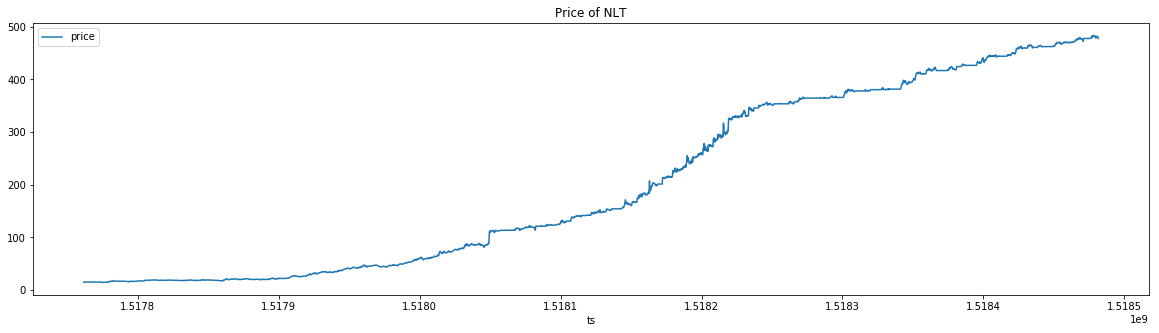

In [6]:
res = pd.DataFrame(res)
res.plot(y='price', x='ts', title="Price of NLT", figsize=(20, 5))

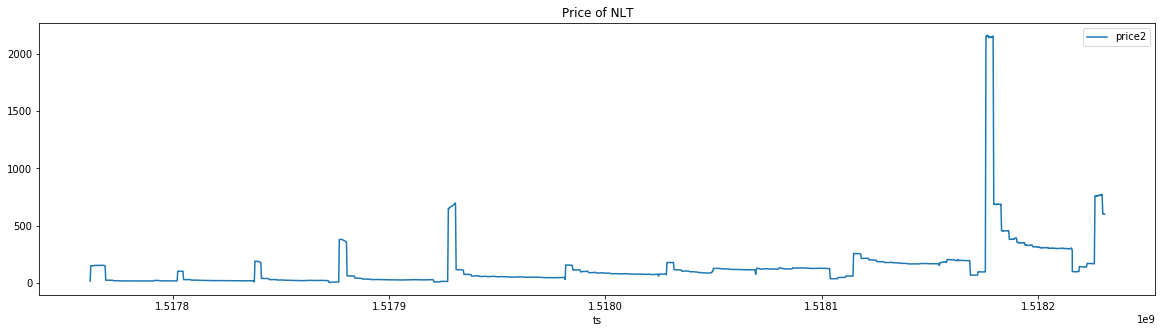

In [7]:
res = pd.DataFrame(res)
res.plot(y='price2', x='ts', title="Price of NLT", figsize=(20, 5))

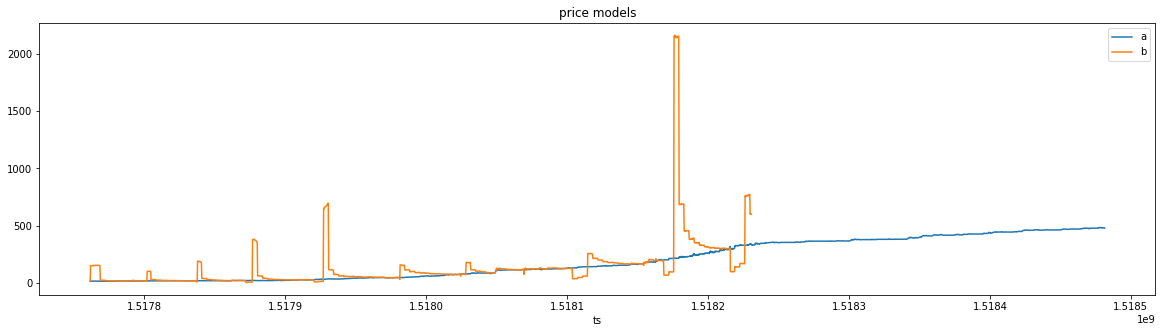

In [8]:
pd.DataFrame(
    {
        'a': res['price'],
        'b': res['price2'],
        'ts': res['ts']
    }
).plot(x='ts', figsize=(20, 5), title="price models")
        


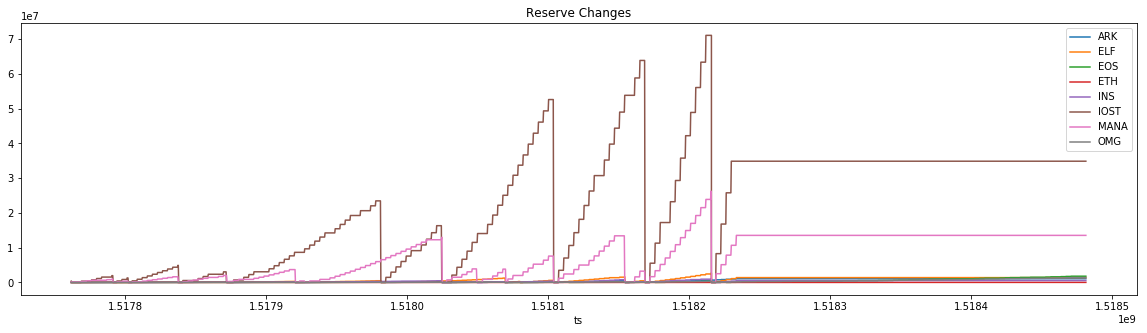

In [9]:
res.drop(columns=['price', 'price2']).plot(title='Reserve Changes', x='ts', figsize=(20, 5))

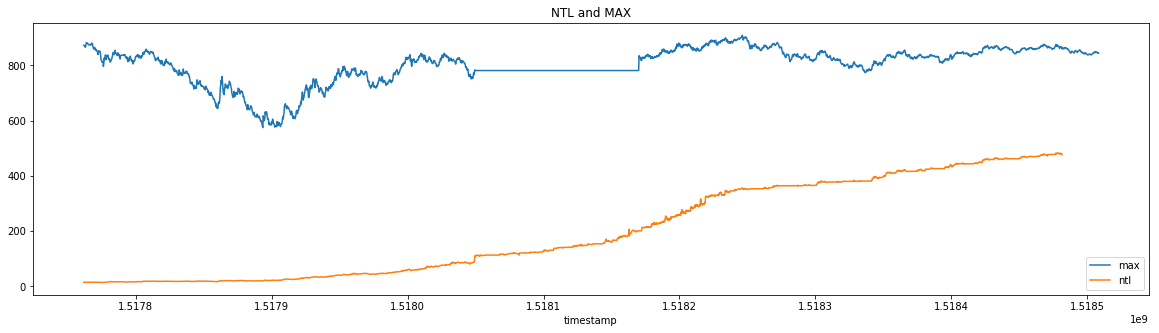

In [10]:
pd.DataFrame({
    'max': m.drop(columns=['timestamp']).T.max(),
    'timestamp': m.timestamp,
    'ntl': res.price
}).plot(x='timestamp', title="NTL and MAX", figsize=(20, 5))

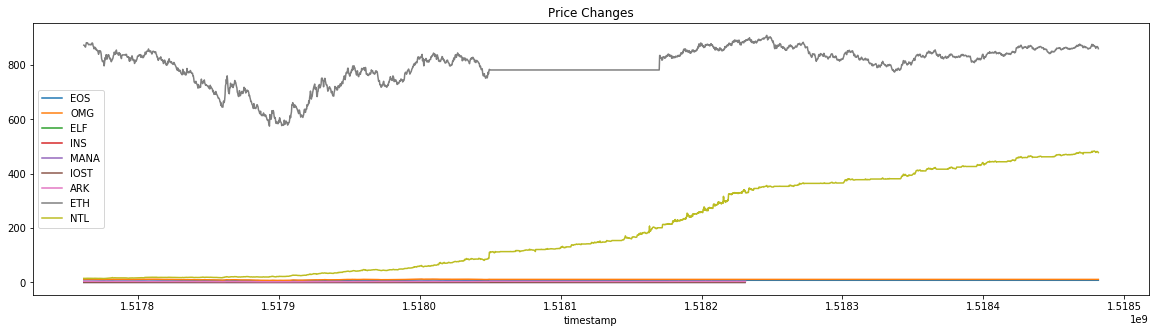

In [11]:
pd.merge(m,
         pd.DataFrame(dict(NTL=res['price'], timestamp=res['ts'])),
         on='timestamp').plot(x='timestamp', title="Price Changes", figsize=(20, 5))

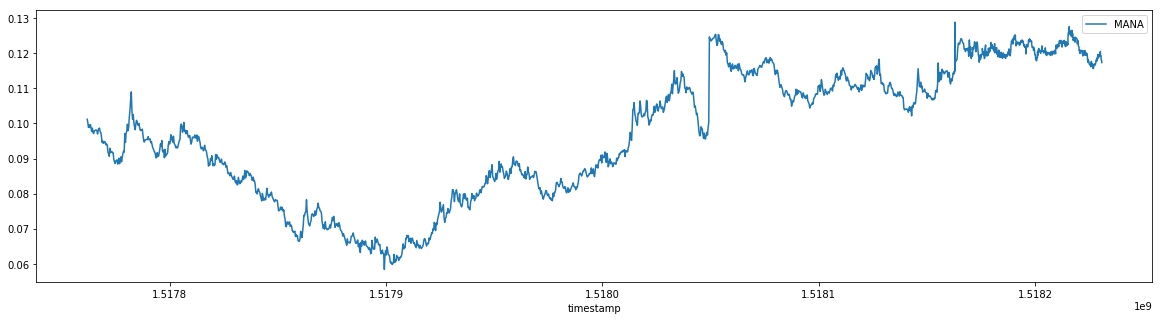

In [12]:
m.plot(y='MANA', x='timestamp', figsize=(20, 5))

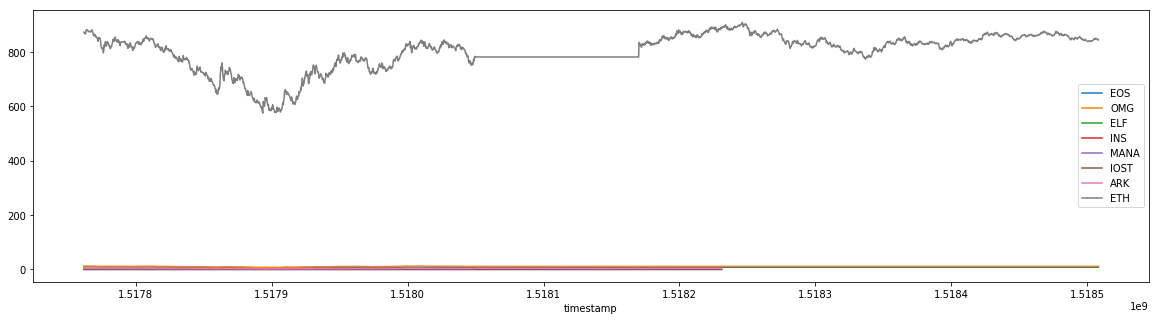

In [13]:
m.plot(x='timestamp', figsize=(20, 5))

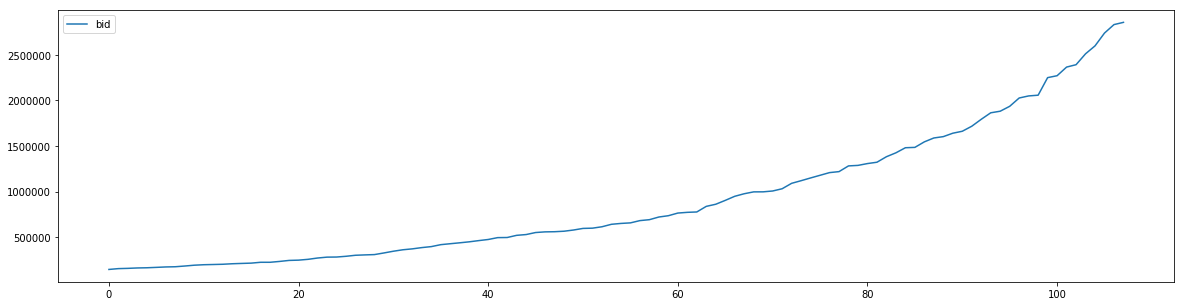

In [14]:
pd.DataFrame([v for v in NLT_components['MANA'].minted.values()]).plot(figsize=(20, 5))

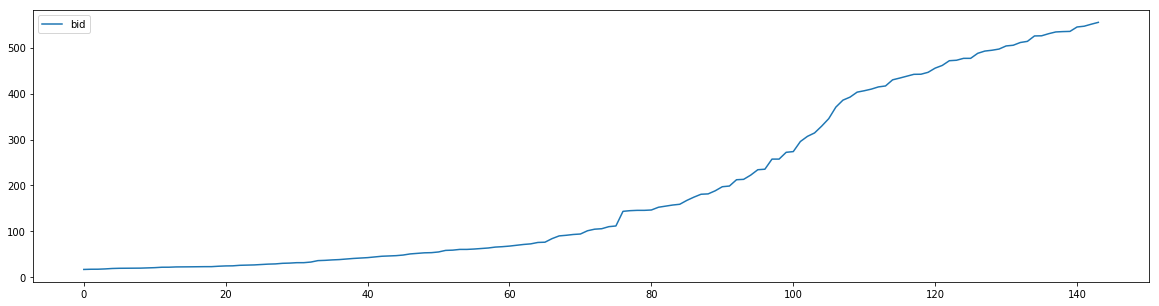

In [15]:
pd.DataFrame([v for v in NLT_components['ETH'].minted.values()]).plot(figsize=(20, 5))

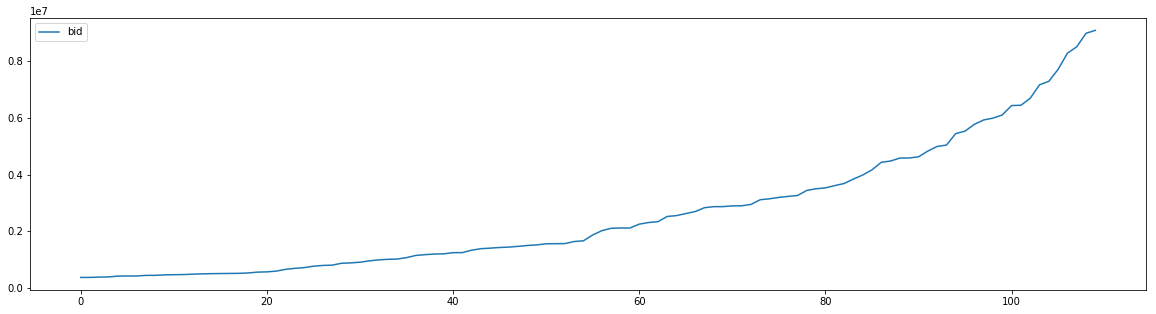

In [16]:
pd.DataFrame([v for v in NLT_components['IOST'].minted.values()]).plot(figsize=(20, 5))